## 1. Vectors and Basic Operations

- **Vector:** An ordered array of numbers (e.g., `[1, 2, 3]` in $\mathbb{R}^3$)
- **Addition/Subtraction:** Element-wise
- **Scalar Multiplication:** Multiply every element by a number
- **Dot Product:** $a \cdot b = \sum a_i b_i$
- **Norm (Length):** $\|a\| = \sqrt{\sum a_i^2}$

Below: Let's create and visualize vectors in 2D.


| **Operation**             | **Math Expression**                              | **Meaning**                             | **Where Used**                              |
| ------------------------- | ------------------------------------------------ | --------------------------------------- | ------------------------------------------- |
| **Vector**                | \$\mathbf{a} = (a\_1, a\_2, \ldots, a\_n)\$      | Ordered numbers, n-dimensional          | Features, embeddings, model params          |
| **Addition/Subtraction**  | \$\mathbf{a} \pm \mathbf{b}\$                    | Element-wise combine/subtract           | Feature engg., parameter update             |
| **Scalar Multiplication** | \$\lambda \mathbf{a}\$                           | Scale each element by \$\lambda\$       | Normalization, learning rate, rescaling     |
| **Dot Product**           | \$\mathbf{a} \cdot \mathbf{b} = \sum a\_i b\_i\$ | Weighted sum, similarity                | Cosine similarity, neural nets, projections |
| **Norm (Length)**         | $\|\mathbf{a}\| = \sqrt{\sum a\_i^2}\$           | Vector magnitude (distance from origin) | Scaling, distance metrics, regularization   |


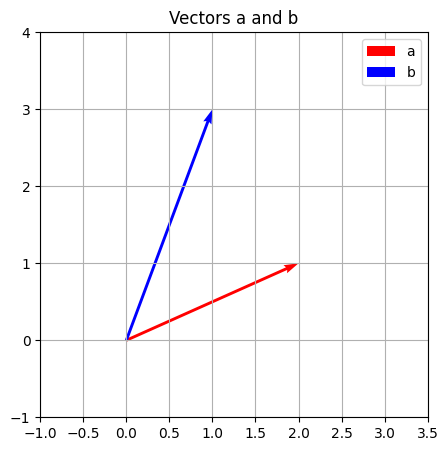

a + b = [3 4]
a - b = [ 1 -2]
Dot product: 5
Norm of a: 2.23606797749979


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define two vectors
a = np.array([2, 1])
b = np.array([1, 3])

# Plot them
plt.figure(figsize=(5, 5))
plt.quiver(0, 0, a[0], a[1], angles='xy', scale_units='xy', scale=1, color='r', label='a')
plt.quiver(0, 0, b[0], b[1], angles='xy', scale_units='xy', scale=1, color='b', label='b')
plt.xlim(-1, 3.5)
plt.ylim(-1, 4)
plt.grid()
plt.legend()
plt.title('Vectors a and b')
plt.show()

# Vector operations
print("a + b =", a + b)
print("a - b =", a - b)
print("Dot product:", np.dot(a, b))
print("Norm of a:", np.linalg.norm(a))


## 2. Linear Combination & Span

- **Linear Combination:** $c_1 v_1 + c_2 v_2 + \dots + c_n v_n$
- **Span:** All points you can reach by linear combinations of given vectors
- In 2D: Two non-colinear vectors span the whole plane.

Below: Visualize span of two vectors.


| **Concept**            | **Math Expression**                                            | **Meaning**                                                                                        | **Where Used in ML/Data Science**                                                                      |
| ---------------------- | -------------------------------------------------------------- | -------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------ |
| **Linear Combination** | \$\mathbf{v} = \lambda\_1 \mathbf{a} + \lambda\_2 \mathbf{b}\$ | Weighted sum of vectors \$\mathbf{a}\$ and \$\mathbf{b}\$ using scalars \$\lambda\_1, \lambda\_2\$ | Any model prediction (\$\hat{y} = w\_1 x\_1 + w\_2 x\_2\$), feature construction, principal components |
| **Span**               | \$\mathrm{span}(\mathbf{a}, \mathbf{b})\$                      | All points reachable by any linear combination of \$\mathbf{a}\$ and \$\mathbf{b}\$                | Feature space, understanding data dimensionality, basis for PCA, expressivity of models                |


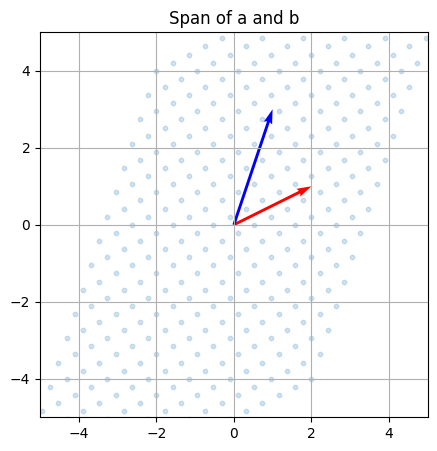

In [9]:
# Create grid of linear combinations
c1 = np.linspace(-2, 2, 20)
c2 = np.linspace(-2, 2, 20)
points = np.array([c1_i*a + c2_j*b for c1_i in c1 for c2_j in c2])

plt.figure(figsize=(5,5))
plt.scatter(points[:,0], points[:,1], alpha=0.2, s=10)
plt.quiver(0, 0, a[0], a[1], angles='xy', scale_units='xy', scale=1, color='r')
plt.quiver(0, 0, b[0], b[1], angles='xy', scale_units='xy', scale=1, color='b')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.title('Span of a and b')
plt.grid()
plt.show()


## 3. Matrices and Matrix Multiplication

- **Matrix:** 2D array of numbers, can represent linear transformations.
- **Multiplication:** $C = AB$, not element-wise!
- Each column of $A$ transformed by $B$.


| **Concept**                | **Math Expression**                        | **Meaning**                                                         | **Where Used in ML/Data Science**                                         |
|----------------------------|--------------------------------------------|---------------------------------------------------------------------|---------------------------------------------------------------------------|
| **Matrix**                 | $A = \begin{pmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{pmatrix}$ | 2D array of numbers (rows × columns), represents linear transformation | Image data, datasets, neural network weights, transformation operations   |
| **Matrix Multiplication**  | $C = AB$                                   | Not element-wise! Each column of $B$ transformed by $A$              | Composing layers in neural nets, applying linear transformations, encoding relationships |
| **Linear Transformation**  | $A\mathbf{x}$                              | Applies transformation $A$ to vector $\mathbf{x}$                    | Feature transformation, PCA, projecting data, changing coordinate systems |


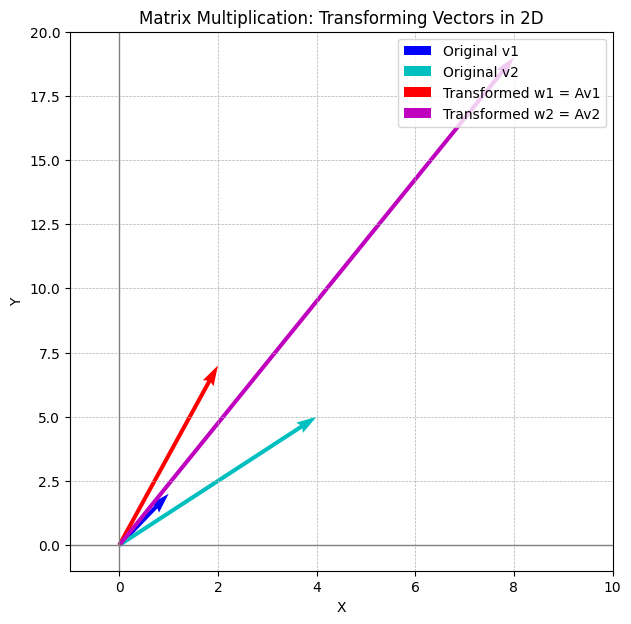

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define matrices
A = np.array([[2, 0],
              [1, 3]])
B = np.array([[1, 4],
              [2, 5]])

# Each column of B is a vector
v1 = B[:, 0]  # [1, 2]
v2 = B[:, 1]  # [4, 5]

# Transform the columns of B by A
C = A @ B
w1 = C[:, 0]  # A @ v1
w2 = C[:, 1]  # A @ v2

plt.figure(figsize=(7, 7))
plt.axhline(0, color='grey', linewidth=1)
plt.axvline(0, color='grey', linewidth=1)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Plot original vectors (from B)
plt.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='b', label='Original v1')
plt.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='c', label='Original v2')

# Plot transformed vectors (from C = AB)
plt.quiver(0, 0, w1[0], w1[1], angles='xy', scale_units='xy', scale=1, color='r', label='Transformed w1 = Av1')
plt.quiver(0, 0, w2[0], w2[1], angles='xy', scale_units='xy', scale=1, color='m', label='Transformed w2 = Av2')

plt.xlim(-1, 10)
plt.ylim(-1, 20)
plt.legend()
plt.title("Matrix Multiplication: Transforming Vectors in 2D")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


## 5. Rank, Linear Independence, Null Space

- **Rank:** Number of linearly independent rows/columns.
- **Linear Independence:** No vector is a combination of others.
- **Null Space:** Solutions to $Ax=0$ (all $x$ mapped to zero).

Below: Check rank and visualize null space in 2D.


| **Concept**               | **Math Expression**                  | **Meaning**                                                             | **Where Used in ML/Data Science**                                   |
|---------------------------|--------------------------------------|-------------------------------------------------------------------------|---------------------------------------------------------------------|
| **Rank**                  | $\mathrm{rank}(A)$                   | Number of linearly independent rows/columns in matrix $A$                | Detecting redundant features, invertibility of matrices, model capacity |
| **Linear Independence**   | $\sum \lambda_i \mathbf{a}_i = 0 \implies \lambda_1 = \cdots = \lambda_n = 0$ | No vector in the set is a linear combination of the others               | Ensuring features add unique info, PCA, building basis vectors          |
| **Null Space**            | $A\mathbf{x} = 0$                    | Set of all vectors $\mathbf{x}$ that are mapped to zero by $A$           | Understanding solutions to equations, dimensionality reduction, error analysis |


Rank of M: 1


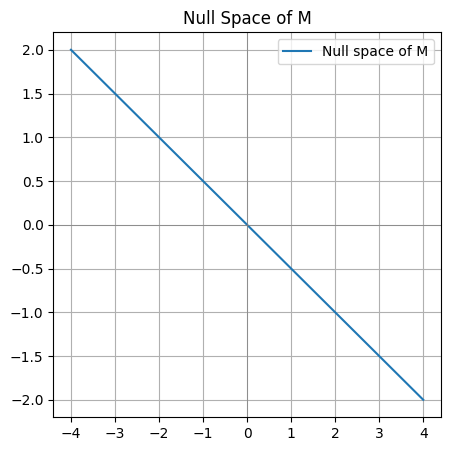

In [11]:
# Matrix with dependent columns
M = np.array([[1, 2], [2, 4]])
rank = np.linalg.matrix_rank(M)
print("Rank of M:", rank)

# Visualizing null space (Ax = 0)
# For [1, 2], [2, 4], any vector x where x1 + 2x2 = 0 lies in null space
x2 = np.linspace(-2, 2, 10)
x1 = -2 * x2
plt.figure(figsize=(5,5))
plt.plot(x1, x2, label='Null space of M')
plt.grid()
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.legend()
plt.title('Null Space of M')
plt.show()


## 6. Determinant and Area

- **Determinant:** $\det(A)$ measures scaling factor of area (2D) or volume (3D).
- If $\det(A)=0$, matrix is singular (not invertible).
- In 2D: Area of parallelogram spanned by columns.

Below: Visualize determinant as area.


| **Concept**      | **Math Expression**                       | **Meaning**                                                        | **Where Used in ML/Data Science**                          |
|------------------|-------------------------------------------|--------------------------------------------------------------------|------------------------------------------------------------|
| **Determinant**  | $\det(A)$                                 | Measures scaling factor of area (2D) or volume (3D); sign shows orientation | Checking invertibility, understanding volume change in transformations, Jacobian in probability |
| **Singular Matrix** | $\det(A) = 0$                             | Matrix is **not invertible** (collapses space, loses information)  | Detecting non-invertible matrices, multicollinearity, feature redundancy   |
| **Area (2D case)**   | $|\det(A)|$                               | Area of the parallelogram formed by the columns of $A$             | Geometric interpretation of data, visualizing feature spread              |


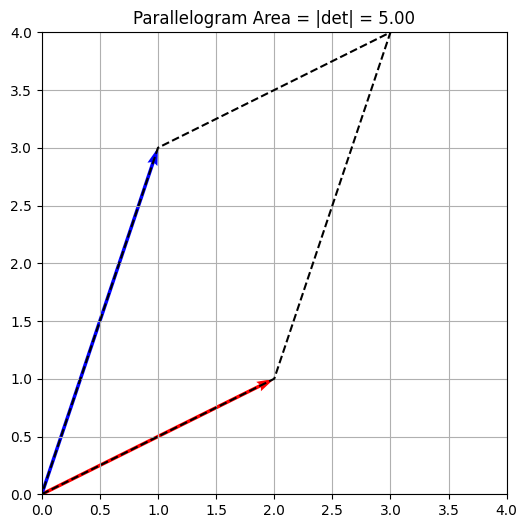

In [12]:
vec1 = np.array([2, 1])
vec2 = np.array([1, 3])
parallelogram = np.column_stack((np.zeros(2), vec1, vec1+vec2, vec2, np.zeros(2)))

plt.figure(figsize=(6,6))
plt.plot(parallelogram[0], parallelogram[1], 'k--')
plt.quiver(0, 0, vec1[0], vec1[1], angles='xy', scale_units='xy', scale=1, color='r')
plt.quiver(0, 0, vec2[0], vec2[1], angles='xy', scale_units='xy', scale=1, color='b')
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.grid()
plt.title(f'Parallelogram Area = |det| = {abs(np.linalg.det(np.column_stack((vec1, vec2)))):.2f}')
plt.show()


## 7. Eigenvalues and Eigenvectors

- For matrix $A$, an **eigenvector** $v$ satisfies $Av = \lambda v$
- $\lambda$ is the **eigenvalue** (scaling factor)
- Important for PCA, stability, etc.
Eigenvectors/values describe “directions” in which a matrix stretches or squashes space, and by how much.

In ML:

PCA: Uses top eigenvectors (“principal components”) of covariance matrix to find best feature directions.

Stability: Eigenvalues > 1 signal instability (important in time series, dynamical systems).

Spectral clustering, Graph ML: Use eigenvalues of adjacency or Laplacian matrices.
Below: Compute and plot eigenvectors.


| **Concept**            | **Math Expression**                | **Meaning**                                                          | **Where Used in ML/Data Science**                                   |
|------------------------|------------------------------------|----------------------------------------------------------------------|---------------------------------------------------------------------|
| **Eigenvector**        | $A\mathbf{v} = \lambda\mathbf{v}$  | Special vector $\mathbf{v}$ that only gets scaled (not rotated) by $A$ | Principal Component Analysis (PCA), covariance analysis, Markov chains, dynamical systems |
| **Eigenvalue**         | $\lambda$ in $A\mathbf{v} = \lambda\mathbf{v}$ | The scaling factor for the eigenvector                               | PCA (variance explained), stability analysis, spectral clustering   |
| **Spectral Decomposition** | $A = Q\Lambda Q^{-1}$               | Breaks matrix into eigenvectors and eigenvalues                      | Dimensionality reduction, understanding transformations, graph analysis |


Eigenvalues: [3. 1.]
Eigenvectors:
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


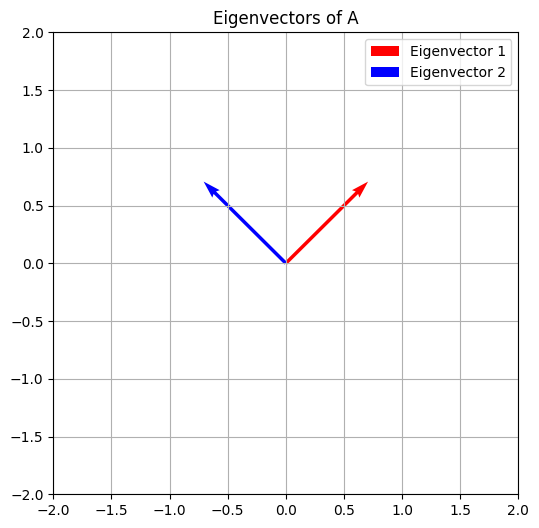

In [13]:
A = np.array([[2, 1],
              [1, 2]])
eigvals, eigvecs = np.linalg.eig(A)
print("Eigenvalues:", eigvals)
print("Eigenvectors:\n", eigvecs)

plt.figure(figsize=(6,6))
plt.quiver(0, 0, eigvecs[0,0], eigvecs[1,0], angles='xy', scale_units='xy', scale=1, color='r', label='Eigenvector 1')
plt.quiver(0, 0, eigvecs[0,1], eigvecs[1,1], angles='xy', scale_units='xy', scale=1, color='b', label='Eigenvector 2')
plt.grid()
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.legend()
plt.title('Eigenvectors of A')
plt.show()


## 8. Orthogonality, Projections, and Gram-Schmidt

- **Orthogonal:** Vectors at 90°; dot product = 0
- **Projection:** "Shadow" of a vector onto another
- **Gram-Schmidt:** Converts a set of vectors into orthogonal set

Below: Visualize projection.


| **Concept**        | **Math Expression**                                       | **Meaning**                                                       | **Where Used in ML/Data Science**                               |
|--------------------|----------------------------------------------------------|-------------------------------------------------------------------|-----------------------------------------------------------------|
| **Orthogonality**  | $\mathbf{a} \cdot \mathbf{b} = 0$                        | Vectors are perpendicular (90°); have no influence on each other  | Decorrelation of features, error minimization, SVD, PCA         |
| **Projection**     | $\mathrm{proj}_{\mathbf{b}}(\mathbf{a}) = \frac{\mathbf{a} \cdot \mathbf{b}}{\|\mathbf{b}\|^2} \mathbf{b}$ | "Shadow" of $\mathbf{a}$ onto $\mathbf{b}$                        | Least squares regression, residuals, dimensionality reduction   |
| **Gram-Schmidt**   | Converts $\{\mathbf{a}_1, \mathbf{a}_2, \dots\}$ into orthogonal set | Produces orthogonal (or orthonormal) basis                        | QR decomposition, constructing bases for PCA, numerical stability|


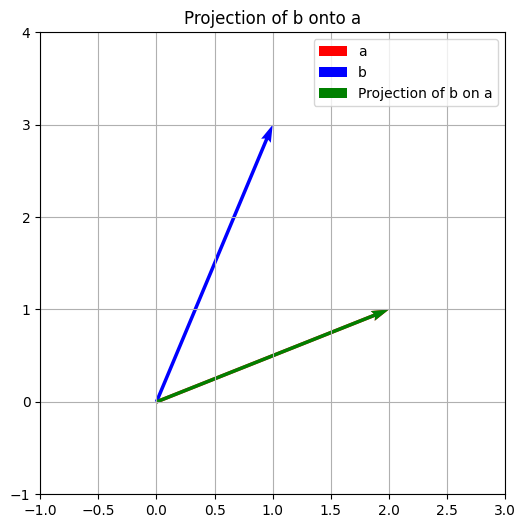

In [14]:
# Project vector b onto a
def proj(u, v):
    return (np.dot(u, v) / np.dot(u, u)) * u

proj_b_on_a = proj(a, b)

plt.figure(figsize=(6,6))
plt.quiver(0, 0, a[0], a[1], angles='xy', scale_units='xy', scale=1, color='r', label='a')
plt.quiver(0, 0, b[0], b[1], angles='xy', scale_units='xy', scale=1, color='b', label='b')
plt.quiver(0, 0, proj_b_on_a[0], proj_b_on_a[1], angles='xy', scale_units='xy', scale=1, color='g', label='Projection of b on a')
plt.grid()
plt.xlim(-1,3)
plt.ylim(-1,4)
plt.legend()
plt.title('Projection of b onto a')
plt.show()


## 9. Singular Value Decomposition (SVD) and PCA

- **SVD:** $A = U \Sigma V^T$, breaks matrix into rotations & scaling.
- **PCA:** Finds directions of maximum variance; uses SVD/eigenvectors.

Below: PCA direction for simple 2D data.


| **Concept**        | **Math Expression**                          | **Meaning**                                                           | **Where Used in ML/Data Science**                                    |
|--------------------|----------------------------------------------|-----------------------------------------------------------------------|----------------------------------------------------------------------|
| **SVD**            | $A = U\Sigma V^T$                           | Breaks matrix $A$ into rotation ($U$, $V^T$) and scaling ($\Sigma$)   | Dimensionality reduction, image compression, latent semantic analysis |
| **PCA**            | Finds top eigenvectors of covariance matrix or uses SVD | Identifies directions (principal components) of maximum variance      | Feature reduction, denoising, visualization, exploratory data analysis|


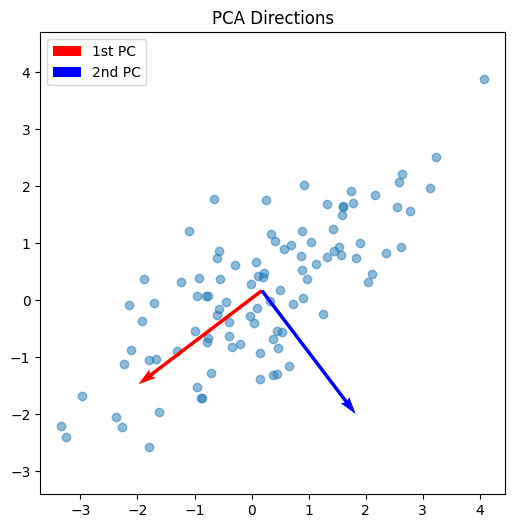

In [16]:
# Simple 2D data cloud
np.random.seed(42)
X = np.random.multivariate_normal([0,0], [[3,2],[2,2]], size=100)
mean = np.mean(X, axis=0)
X_centered = X - mean
cov = np.cov(X_centered, rowvar=False)
eigvals, eigvecs = np.linalg.eigh(cov)
# Sort eigenvectors by eigenvalue
order = np.argsort(eigvals)[::-1]
eigvecs = eigvecs[:, order]

plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], alpha=0.5)
plt.quiver(mean[0], mean[1], eigvecs[0,0], eigvecs[1,0], scale=3, color='r', label='1st PC')
plt.quiver(mean[0], mean[1], eigvecs[0,1], eigvecs[1,1], scale=3, color='b', label='2nd PC')
plt.title('PCA Directions')
plt.axis('equal')
plt.legend()
plt.show()
